In [2]:
# What version of Python do you have?
import sys
import os
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import re
import mne
from datetime import datetime
import pytz
import random
import os
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.6.0
Keras Version: 2.6.0

Python 3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
Scikit-Learn 1.0
GPU is available


In [3]:
test_dir = "../windows/test"

In [4]:
from PIL import Image
from matplotlib import image

image = Image.open(test_dir + "/Seizure/chb10_12_0_F3-C3_18-40-13.png")
image.show()

In [5]:
image = image.resize((224,224))
image = image.convert('RGB')

In [6]:
np_img = np.asarray(image)

In [7]:
np_img.shape

(224, 224, 3)

In [8]:
def limit_data_samples(data_dir, n=219):
  a = []
  for i in os.listdir(data_dir):
    for index, item in enumerate(os.listdir(data_dir+'/'+i)):
      if index > n-1:continue
      img = Image.open(f'{data_dir}/{i}/{item}')
      img = img.resize((224,224))
      img = img.convert('RGB')
      np_img = np.asarray(img)
      a.append((np_img,i))
  return  pd.DataFrame(a, columns=['filename', 'class'])

In [9]:
test_df2 = limit_data_samples(test_dir)

In [10]:
len(test_df2)

852

In [11]:
data_example = test_df2['filename'][0]

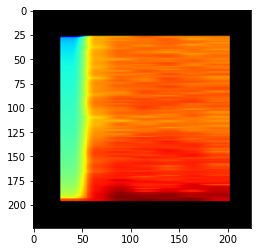

In [12]:
plt.imshow(data_example, interpolation='nearest')

In [13]:
test_df2.to_csv('test_data')

In [14]:
test3 = pd.read_csv("test_data")

In [15]:
new = test3['filename'][0]
new.replace("\n", "")

'[[[0 0 0]  [0 0 0]  [0 0 0]  ...  [0 0 0]  [0 0 0]  [0 0 0]] [[0 0 0]  [0 0 0]  [0 0 0]  ...  [0 0 0]  [0 0 0]  [0 0 0]] [[0 0 0]  [0 0 0]  [0 0 0]  ...  [0 0 0]  [0 0 0]  [0 0 0]] ... [[0 0 0]  [0 0 0]  [0 0 0]  ...  [0 0 0]  [0 0 0]  [0 0 0]] [[0 0 0]  [0 0 0]  [0 0 0]  ...  [0 0 0]  [0 0 0]  [0 0 0]] [[0 0 0]  [0 0 0]  [0 0 0]  ...  [0 0 0]  [0 0 0]  [0 0 0]]]'

In [16]:
def limit_data_samples(data_dir, n=219, shape=(224,224)):
  a = []
  for i in os.listdir(data_dir):
    for index, item in enumerate(os.listdir(data_dir+'/'+i)):
      if index > n-1:continue
      img = Image.open(f'{data_dir}/{i}/{item}')
      img = img.resize(shape)
      img = img.convert('RGB')
      np_img = np.asarray(img)
      a.append((np_img,i))
  return np.array(a)

In [17]:
test4 = limit_data_samples(test_dir)
test5= limit_data_samples(test_dir, shape=(299, 299))

C:\Users\45535\AppData\Local\Temp/ipykernel_14128/2933099766.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a)


In [18]:
test4[0][1]

'Interictal'

In [19]:
len(test4)

852

In [20]:
type(test4)

numpy.ndarray

In [21]:
test4.shape

(852, 2)

In [22]:
np.save('test.npy', test4)

In [23]:
np3 = np.load('test.npy', allow_pickle=True)

In [24]:
len(np3)

852

In [25]:
np3.shape

(852, 2)

In [26]:
model = tensorflow.keras.models.load_model("single.h5")


In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [28]:
predictions = []
labels = [element[1] for element in np3]
resnet_test = [element[0] for element in np3]
incep_test = [element[0] for element in test5]



In [32]:
from sklearn.preprocessing import minmax_scale, MinMaxScaler


In [33]:
resnet_test[0][0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [39]:
incep_test = np.array(incep_test, dtype=np.float)
incep_test.shape

(852, 299, 299, 3)

In [42]:
incep_test[0][1][1]

array([0., 0., 0.])

In [ ]:
image_tensor = tensorflow.convert_to_tensor(resnet_test, dtype=tensorflow.float32)

In [ ]:
resnet_test[0].shape

(224, 224, 3)

In [ ]:
model.predict([incep_test[0], resnet_test[0]])

ValueError: Data cardinality is ambiguous:
  x sizes: 299, 224
Make sure all arrays contain the same number of samples.